# 김가네 팀플 (4) 데이터 분석 (워드클라우드)_ 230622
- 팀원 별로 분담해서 분석 진행

In [204]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
pd.set_option('mode.chained_assignment',  None)

In [207]:
# 전처리 완료된 데이터 파일 불러오기
CS = pd.read_csv('CS.csv', encoding='euc-kr')
CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       20624 non-null  int64
 1   where_cnt      20624 non-null  int64
 2   attend_cnt     20624 non-null  int64
 3   volunteer_cnt  20624 non-null  int64
 4   history_cnt    20624 non-null  int64
 5   festival_cnt   20624 non-null  int64
 6   standard       20624 non-null  int64
 7   block          20624 non-null  int64
 8   expense        20624 non-null  int64
 9   expense_f      20624 non-null  int64
 10  difficulty     20624 non-null  int64
 11  intention      20624 non-null  int64
 12  history        20624 non-null  int64
 13  history_f      20624 non-null  int64
 14  festival       20624 non-null  int64
 15  festival_f     20624 non-null  int64
 16  sex            20624 non-null  int64
 17  age            20624 non-null  int64
 18  education      20624 non-null  int64
 19  marr

## 워드 클라우드 진행

In [208]:
# 워드클라우드 만들 때 필요한 wordcloud 패키지 설치하기 
# !pip install wordcloud

In [209]:
# 워드클라우드를 원하는 형태의 이미지를 이용해 처리하기 위해
# 파이썬 이미지 처리 패키지인 pillow(PIL) 패키지 설치
# PIL = Python Imaging Library

# !pip install pillow

In [210]:
# 위에서 설치한 라이브러리 import 
from wordcloud import WordCloud
from PIL import *

### 워드클라우드 예제 적용 가능한지 확인

In [212]:
# 워드클라우드 모양 잡기
cand_mask = np.array(Image.open('circle_image.jpg'))

cand_mask

array([[[255, 255, 255, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        ...,
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [213]:
# 워드클라우드에 출력할 딕셔너리 생성
words = {
    '돔돔이블로그':1965,
    'domdom':1666,
    '티스토리':955,
    '돔돔':855,
    '워드':841,
    '클라우드':612,
    '파이썬':598,
    'tistory':576,
    '코딩':542,
    '장인':487,
    '블로그':412,
    '방문자':401,
    '댓글':397,
    '롤':391,
    '칼바람':308,
    '나락':284,
    '환영':255,
    '자바':231,
    '장고':175,
    '자바스크립트':152,
    '스프링':109,
    '부트':71,
    '스타벅스':68,
    '제주말차':59,
    '프라푸치노':21,
    '먹고싶다':19,
    '디저트':6,
    '꿀잼':2
}

In [214]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색은 빨간색으로
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(words)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

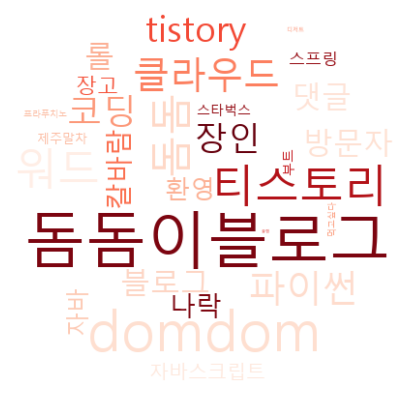

In [215]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

In [216]:
# 워드클라우드 이미지 저장
# plt.savefig('test.png')

## 국민문화예술활동조사 데이터로 워드클라우드 생성

### 워드클라우드 시각화가 필요한 feature

- standard : 기준
- block : 걸림돌
- difficulty : 어려움
- expense : 가장 많이 지출한 1순위 (후순위 작업)
- expense_f : 향후 지출 의향 1순위 (후순위 작업)



### block 과 difficulty 기준 분리
- block : 문화행사 '직접 관람' 시 어려움
- difficulty : 문화행사 '참여' 시 어려움

### 각 feature 별 범주 코드 기준 확인

In [36]:
standard_words = {
    1:'컨텐츠 및 퀄리티',
    2:'비용',
    3:'작가 및 출연진',
    4:'개최 장소의 유명도',
    5:'교통',
    6:'편의시설여부',
    7:'전문가 의견 및 언론보도',
    8:'주위 의견 및 네티즌 의견',
    9:'접근성',
    10:'기타',
}

In [37]:
block_words = {
    1:'비용',
    2:'시간',
    3:'관심도',
    4:'교통',
    5:'편의시설미비',
    6:'관련정보부족',
    7:'친구없음',
    8:'시설부족',
    9:'기타',
}

In [38]:
difficulty_words = {
    1:'비용',
    2:'시간',
    3:'관심도',
    4:'교통',
    5:'편의시설미비',
    6:'관련정보부족',
    7:'친구없음',
    8:'시설부족',
    9:'기타',
}

In [130]:
expense_words = {
    1:'문학',
    2:'미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'전시회',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

### 기존의 숫자 코드 -> 문자 기준으로 변경

In [139]:
# 워드클라우드 생성을 위한 데이터프레임 할당
CS_wordcloud = CS[['standard', 'block', 'difficulty', 'expense', 'expense_f']]
CS_wordcloud

,standard,block,difficulty,expense,expense_f
0,1,1,3,14,14
1,2,6,1,14,9
2,2,1,1,8,15
3,1,2,4,14,14
4,2,1,4,14,14
...,...,...,...,...,...
20619,4,3,6,12,12
20620,1,2,2,12,12
20621,1,2,2,17,12
20622,1,2,2,12,12


In [140]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'standard',
    'block',
    'difficulty',
    'expense',
    'expense_f'
]

In [141]:
# 코드값 변경이 필요한 열들의 변경 전 빈도값 출력
for column in need_setting_columns:
    CS_wordcloud[column].value_counts(ascending=False)

standard
1     6542
2     5412
9     2233
5     2167
3     2036
4      866
7      470
6      441
8      428
10      29
Name: count, dtype: int64

block
2    5738
1    5401
3    3468
6    2087
8    1476
4    1277
5     568
7     527
9      82
Name: count, dtype: int64

difficulty
2    6209
3    4408
1    3511
6    2977
8    1189
4    1030
5     623
7     600
9      77
Name: count, dtype: int64

expense
14    5771
17    5233
12    4786
5     1081
15     747
1      706
8      560
7      511
11     248
9      238
13     201
16     189
2       89
10      87
6       67
4       65
3       45
Name: count, dtype: int64

expense_f
12    5837
14    4724
15    2161
17    1801
1      876
5      780
9      745
11     740
13     687
8      570
16     459
7      440
10     297
6      166
4      135
2      129
3       77
Name: count, dtype: int64

In [142]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [standard_words, block_words, difficulty_words, expense_words, expense_words]

In [143]:
# 코드 변경 함수 선언
def get_list_setting_column(column, setting_prev_next):
    setting_done_list = []
    
    for code_value in column:
        setting_done_list.append(setting_prev_next[code_value])
    
    return setting_done_list

In [144]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_wordcloud[column] = get_list_setting_column(CS_wordcloud[column], setting_codes[i])

In [145]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_wordcloud[column].value_counts(ascending=False)

standard
컨텐츠 및 퀄리티         6542
비용                5412
접근성               2233
교통                2167
작가 및 출연진          2036
개최 장소의 유명도         866
전문가 의견 및 언론보도      470
편의시설여부             441
주위 의견 및 네티즌 의견     428
기타                  29
Name: count, dtype: int64

block
시간        5738
비용        5401
관심도       3468
관련정보부족    2087
시설부족      1476
교통        1277
편의시설미비     568
친구없음       527
기타          82
Name: count, dtype: int64

difficulty
시간        6209
관심도       4408
비용        3511
관련정보부족    2977
시설부족      1189
교통        1030
편의시설미비     623
친구없음       600
기타          77
Name: count, dtype: int64

expense
영화        6282
연극/뮤지컬    5867
해당사항없음    5233
대중음악      1307
문학         706
전통예술       313
무용         268
전시회        238
기타         189
서양음악       132
미술          89
Name: count, dtype: int64

expense_f
연극/뮤지컬    6617
영화        5164
대중음악      2731
해당사항없음    1801
문학         876
전통예술       875
무용         853
전시회        745
기타         459
서양음악       374
미술         129
Name: count, dtype: int64

## 숫자 코드 --> 문자 기준으로 바꾼 결과
- 바뀐 데이터프레임 확인
- 각 열에 해당하는 시리즈를 딕셔너리로 변환

In [146]:
CS_wordcloud

,standard,block,difficulty,expense,expense_f
0,컨텐츠 및 퀄리티,비용,관심도,영화,영화
1,비용,관련정보부족,비용,영화,전시회
2,비용,비용,비용,대중음악,대중음악
3,컨텐츠 및 퀄리티,시간,교통,영화,영화
4,비용,비용,교통,영화,영화
...,...,...,...,...,...
20619,개최 장소의 유명도,관심도,관련정보부족,연극/뮤지컬,연극/뮤지컬
20620,컨텐츠 및 퀄리티,시간,시간,연극/뮤지컬,연극/뮤지컬
20621,컨텐츠 및 퀄리티,시간,시간,해당사항없음,연극/뮤지컬
20622,컨텐츠 및 퀄리티,시간,시간,연극/뮤지컬,연극/뮤지컬


In [148]:
# {'기준' : 개수} 로 딕셔너리 생성

standard_dict = CS_wordcloud['standard'].value_counts(ascending=False).to_dict()
block_dict = CS_wordcloud['block'].value_counts(ascending=False).to_dict()
difficulty_dict = CS_wordcloud['difficulty'].value_counts(ascending=False).to_dict()
expense_dict = CS_wordcloud['expense'].value_counts(ascending=False).to_dict()
expense_f_dict = CS_wordcloud['expense_f'].value_counts(ascending=False).to_dict()

standard_dict
block_dict
difficulty_dict
expense_dict
expense_f_dict

{'컨텐츠 및 퀄리티': 6542,
 '비용': 5412,
 '접근성': 2233,
 '교통': 2167,
 '작가 및 출연진': 2036,
 '개최 장소의 유명도': 866,
 '전문가 의견 및 언론보도': 470,
 '편의시설여부': 441,
 '주위 의견 및 네티즌 의견': 428,
 '기타': 29}

{'시간': 5738,
 '비용': 5401,
 '관심도': 3468,
 '관련정보부족': 2087,
 '시설부족': 1476,
 '교통': 1277,
 '편의시설미비': 568,
 '친구없음': 527,
 '기타': 82}

{'시간': 6209,
 '관심도': 4408,
 '비용': 3511,
 '관련정보부족': 2977,
 '시설부족': 1189,
 '교통': 1030,
 '편의시설미비': 623,
 '친구없음': 600,
 '기타': 77}

{'영화': 6282,
 '연극/뮤지컬': 5867,
 '해당사항없음': 5233,
 '대중음악': 1307,
 '문학': 706,
 '전통예술': 313,
 '무용': 268,
 '전시회': 238,
 '기타': 189,
 '서양음악': 132,
 '미술': 89}

{'연극/뮤지컬': 6617,
 '영화': 5164,
 '대중음악': 2731,
 '해당사항없음': 1801,
 '문학': 876,
 '전통예술': 875,
 '무용': 853,
 '전시회': 745,
 '기타': 459,
 '서양음악': 374,
 '미술': 129}

## 최종 워드클라우드 생성

In [225]:
# standard_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='summer', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(standard_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

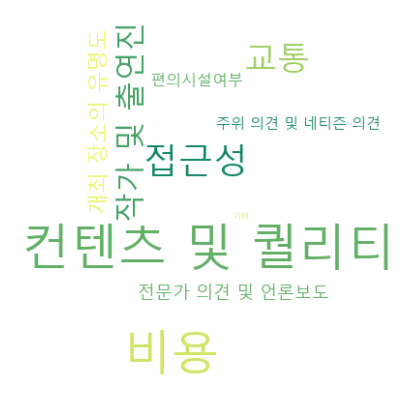

In [226]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

In [227]:
# block_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='PuBu', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(block_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

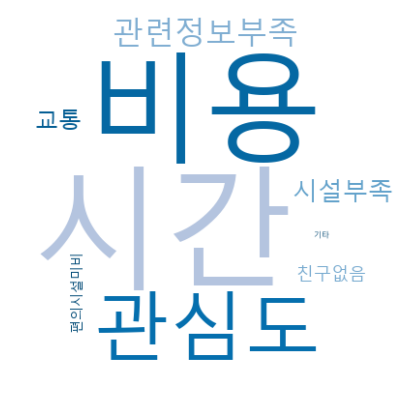

In [228]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

In [229]:
# difficulty_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Blues', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(difficulty_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

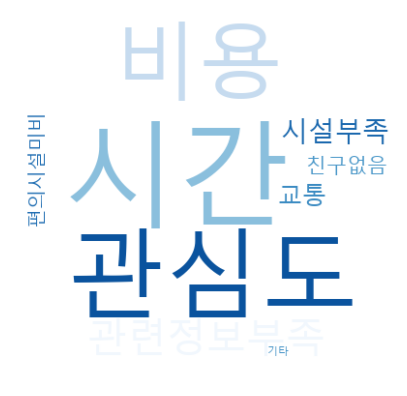

In [230]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

In [231]:
# 딕셔너리에 '해당사항없음' value 제거
del expense_dict['해당사항없음']

In [236]:
# expense_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(expense_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

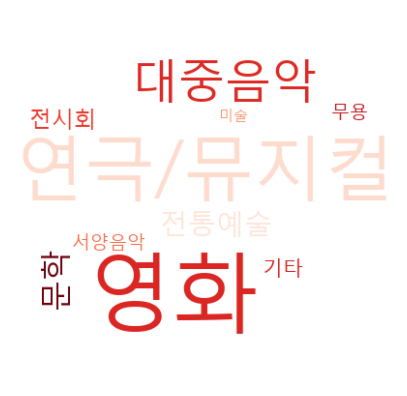

In [237]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

In [172]:
# 딕셔너리에 '해당사항없음' value 제거
del expense_f_dict['해당사항없음']

In [173]:
# expense_f_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(expense_f_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

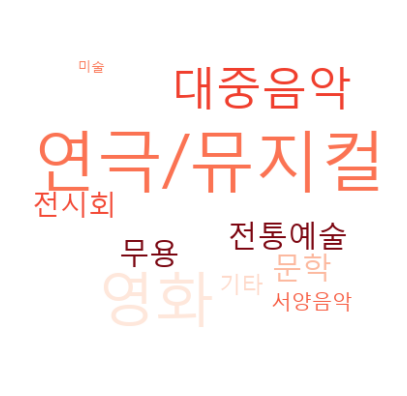

In [174]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

## 연령대별 (시니어) 필터링 후 워드클라우드 진행

In [282]:
# 전처리 완료된 데이터 파일 불러오기
CS = pd.read_csv('CS_pred.csv', encoding='euc-kr')
CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       2144 non-null   int64
 1   where_cnt      2144 non-null   int64
 2   attend_cnt     2144 non-null   int64
 3   volunteer_cnt  2144 non-null   int64
 4   history_cnt    2144 non-null   int64
 5   festival_cnt   2144 non-null   int64
 6   standard       2144 non-null   int64
 7   block          2144 non-null   int64
 8   expense        2144 non-null   int64
 9   expense_f      2144 non-null   int64
 10  difficulty     2144 non-null   int64
 11  intention      2144 non-null   int64
 12  history        2144 non-null   int64
 13  history_f      2144 non-null   int64
 14  festival       2144 non-null   int64
 15  festival_f     2144 non-null   int64
 16  sex            2144 non-null   int64
 17  age            2144 non-null   int64
 18  education      2144 non-null   int64
 19  marrie

In [284]:
# 연령대별 필터링 데이터프레임
CS_senior = CS.copy()
CS_senior = CS_senior[(CS_senior.target==1)]
CS_senior

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,sex,age,education,married,work,income,sido,disabled,pred,target
1,3,3,3,0,1,0,2,6,14,9,...,2,5,3,2,5,7,1,1,1,1
4,7,0,0,0,0,0,3,2,15,12,...,2,5,3,2,1,5,1,1,1,1
7,7,2,2,0,0,0,2,2,14,14,...,2,5,3,2,3,5,1,1,1,1
18,7,0,0,0,1,0,4,8,17,14,...,1,5,4,2,1,5,1,1,1,1
24,3,0,0,0,3,2,3,2,17,7,...,1,6,3,2,2,4,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,0,0,0,0,0,0,2,2,17,17,...,1,5,3,1,1,3,9,1,1,1
2135,2,0,0,0,2,2,3,5,17,14,...,1,6,3,2,1,5,1,1,1,1
2136,5,0,0,0,1,1,4,1,12,12,...,2,5,3,2,1,5,1,1,1,1
2142,7,2,0,0,4,0,1,2,16,16,...,2,5,3,2,3,6,1,1,1,1


In [285]:
# 5가지 열만 사용
CS_senior = CS_senior[['standard', 'block', 'difficulty', 'expense', 'expense_f']]
CS_senior

,standard,block,difficulty,expense,expense_f
1,2,6,1,14,9
4,3,2,2,15,12
7,2,2,1,14,14
18,4,8,2,17,14
24,3,2,2,17,7
...,...,...,...,...,...
2120,2,2,2,17,17
2135,3,5,2,17,14
2136,4,1,5,12,12
2142,1,2,2,16,16


In [286]:
# 코드값 변경이 필요한 열들의 변경 전 빈도값 출력
for column in need_setting_columns:
    CS_senior[column].value_counts(ascending=False)

standard
1     229
2     214
3      89
9      78
5      60
4      38
6      18
7      10
8       5
10      2
Name: count, dtype: int64

block
2    273
1    153
3    135
6     71
8     39
4     36
7     22
5     11
9      3
Name: count, dtype: int64

difficulty
2    265
3    216
1     90
6     73
7     27
8     25
5     22
4     21
9      4
Name: count, dtype: int64

expense
17    346
12    143
14    108
5      39
15     23
1      20
16     14
7      11
8      10
11      9
9       5
2       4
13      4
4       3
6       2
3       2
Name: count, dtype: int64

expense_f
12    248
17    106
14    102
15     63
1      35
11     27
5      27
9      25
13     23
16     21
8      18
7      11
10     10
4       9
2       8
6       7
3       3
Name: count, dtype: int64

In [287]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [standard_words, block_words, difficulty_words, expense_words, expense_words]

In [288]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_senior[column] = get_list_setting_column(CS_senior[column], setting_codes[i])

In [289]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_senior[column].value_counts(ascending=False)

standard
컨텐츠 및 퀄리티         229
비용                214
작가 및 출연진           89
접근성                78
교통                 60
개최 장소의 유명도         38
편의시설여부             18
전문가 의견 및 언론보도      10
주위 의견 및 네티즌 의견      5
기타                  2
Name: count, dtype: int64

block
시간        273
비용        153
관심도       135
관련정보부족     71
시설부족       39
교통         36
친구없음       22
편의시설미비     11
기타          3
Name: count, dtype: int64

difficulty
시간        265
관심도       216
비용         90
관련정보부족     73
친구없음       27
시설부족       25
편의시설미비     22
교통         21
기타          4
Name: count, dtype: int64

expense
해당사항없음    346
연극/뮤지컬    182
영화        119
대중음악       33
문학         20
기타         14
전통예술       12
무용          6
전시회         5
미술          4
서양음악        2
Name: count, dtype: int64

expense_f
연극/뮤지컬    275
영화        113
해당사항없음    106
대중음악       81
전통예술       36
문학         35
무용         30
전시회        25
기타         21
서양음악       13
미술          8
Name: count, dtype: int64

In [290]:
# 문자로 바꿔준 데이터프레임 확인
CS_senior

,standard,block,difficulty,expense,expense_f
1,비용,관련정보부족,비용,영화,전시회
4,작가 및 출연진,시간,시간,대중음악,연극/뮤지컬
7,비용,시간,비용,영화,영화
18,개최 장소의 유명도,시설부족,시간,해당사항없음,영화
24,작가 및 출연진,시간,시간,해당사항없음,영화
...,...,...,...,...,...
2120,비용,시간,시간,해당사항없음,해당사항없음
2135,작가 및 출연진,편의시설미비,시간,해당사항없음,영화
2136,개최 장소의 유명도,비용,편의시설미비,연극/뮤지컬,연극/뮤지컬
2142,컨텐츠 및 퀄리티,시간,시간,기타,기타


In [301]:
# {'기준' : 개수} 로 딕셔너리 생성

standard_dict = CS_senior['standard'].value_counts(ascending=False).to_dict()
block_dict = CS_senior['block'].value_counts(ascending=False).to_dict()
difficulty_dict = CS_senior['difficulty'].value_counts(ascending=False).to_dict()
expense_dict = CS_senior['expense'].value_counts(ascending=False).to_dict()
expense_f_dict = CS_senior['expense_f'].value_counts(ascending=False).to_dict()

standard_dict
block_dict
difficulty_dict
expense_dict
expense_f_dict

{'컨텐츠 및 퀄리티': 229,
 '비용': 214,
 '작가 및 출연진': 89,
 '접근성': 78,
 '교통': 60,
 '개최 장소의 유명도': 38,
 '편의시설여부': 18,
 '전문가 의견 및 언론보도': 10,
 '주위 의견 및 네티즌 의견': 5,
 '기타': 2}

{'시간': 273,
 '비용': 153,
 '관심도': 135,
 '관련정보부족': 71,
 '시설부족': 39,
 '교통': 36,
 '친구없음': 22,
 '편의시설미비': 11,
 '기타': 3}

{'시간': 265,
 '관심도': 216,
 '비용': 90,
 '관련정보부족': 73,
 '친구없음': 27,
 '시설부족': 25,
 '편의시설미비': 22,
 '교통': 21,
 '기타': 4}

{'해당사항없음': 346,
 '연극/뮤지컬': 182,
 '영화': 119,
 '대중음악': 33,
 '문학': 20,
 '기타': 14,
 '전통예술': 12,
 '무용': 6,
 '전시회': 5,
 '미술': 4,
 '서양음악': 2}

{'연극/뮤지컬': 275,
 '영화': 113,
 '해당사항없음': 106,
 '대중음악': 81,
 '전통예술': 36,
 '문학': 35,
 '무용': 30,
 '전시회': 25,
 '기타': 21,
 '서양음악': 13,
 '미술': 8}

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

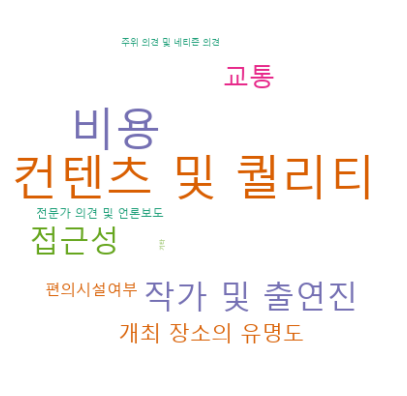

In [300]:
# standard_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Dark2', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(standard_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

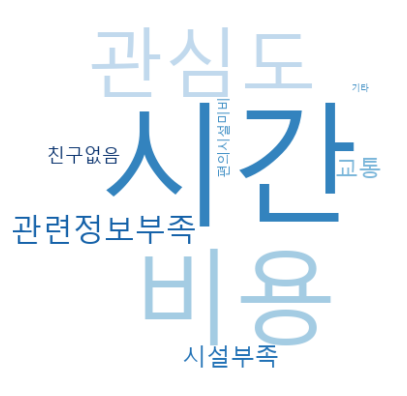

In [299]:
# block_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Blues', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(block_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

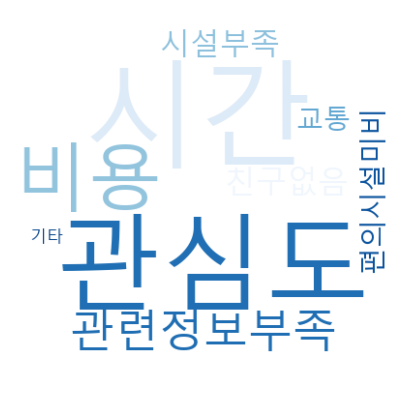

In [294]:
# difficulty_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Blues', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(difficulty_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

In [295]:
# 딕셔너리에 '해당사항없음' value 제거
del expense_dict['해당사항없음']

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

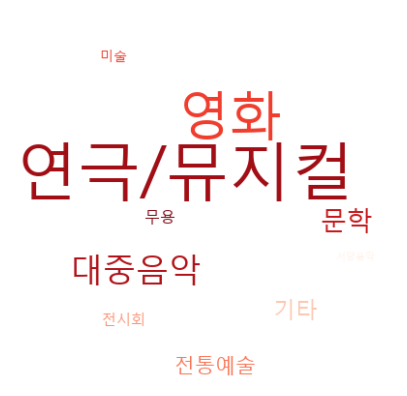

In [298]:
# expense_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(expense_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

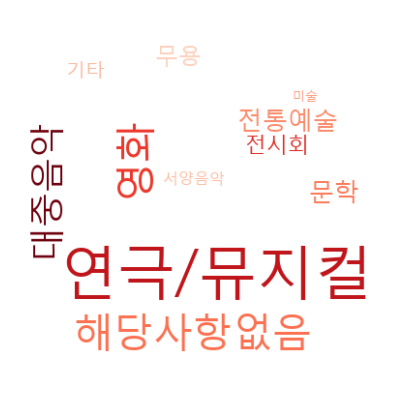

In [297]:
# expense_f_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(expense_f_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')